# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [2]:
# 데이터 로드
data = pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\ESAA_week11_2\abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [3]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [4]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [14]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [8]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age = pred + 1.5       # 예측 고리수 + 1.5
true_age = y_test + 1.5     # 실제 고리수 + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(true_age, pred_age)
rmse = np.sqrt(mse)

3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [13]:
data.columns
coeff = pd.Series(ridge.coef_, index=data.columns)
print(coeff.sort_values(ascending=False))

Whole weight       8.256581
Diameter           8.187989
Shell weight       8.018590
Height             7.838058
Length             2.659069
M                  0.298391
F                  0.269629
I                 -0.568020
Viscera weight    -9.385624
Shucked weight   -18.418234
dtype: float64


전체적으로 전복의 나이에 가장 영향을 많이 주는 특성은 전복의 전체 무게(Whole weight), 지름(Diameter), 껍질 무게(Shell weight), 높이(Height) 등 전반적인 크기와 성장 정도를 나타내는 변수들임을 확인할 수 있다.

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [15]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]


In [17]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
neg_mse_scores = cross_val_score(
        ridge, X, y,
        scoring='neg_mean_squared_error',
        cv=5
    )

rmse_scores = np.sqrt(-neg_mse_scores)
mean_rmse = np.mean(rmse_scores)

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [18]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [22]:
#모델 생성 및 훈련
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=0
)
xgb.fit(X_train, y_train)

#예측값 구하기
pred_rings = xgb.predict(X_test)


#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age = pred_rings + 1.5      # 예측 고리수 + 1.5
true_age = y_test + 1.5          # 실제 고리수 + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(true_age, pred_age)
rmse = np.sqrt(mse)


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

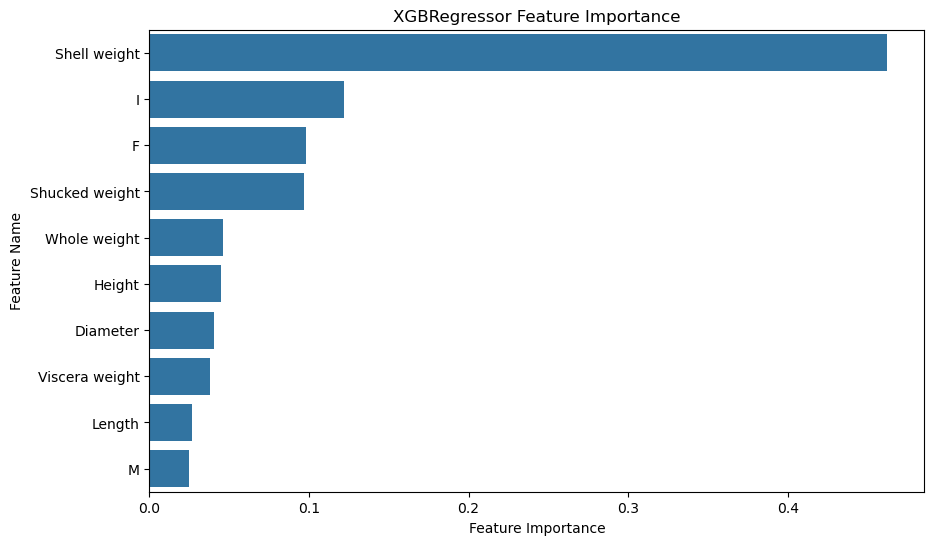

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# XGBRegressor 모델에서 피처 중요도 가져오기
feature_importance = pd.Series(xgb.feature_importances_, index=data.columns)

# 중요도 큰 순으로 정렬
feature_importance = feature_importance.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("XGBRegressor Feature Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [26]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [27]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [28]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [32]:
log_reg = LogisticRegression(
    multi_class='multinomial',   # 다중 클래스 softmax
    solver='lbfgs',              # 다항분류에 잘 맞는 solver
    max_iter=1000                # 반복 횟수 증가 (수렴 문제 방지)
)

log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [33]:
#기울기
print("기울기(회귀계수) coef_ :")
print(log_reg.coef_)

기울기(회귀계수) coef_ :
[[-0.49522667  0.53620424  0.63969181 -0.29341828  0.00104889  0.14983225
   0.96717277  0.09981048 -0.06427163  0.09736236 -0.19521342  0.51083323
   0.00891678]
 [ 0.62181325 -0.86378467 -0.68064729  0.2045488  -0.02148958  0.38749829
  -0.0449386   0.1653303   0.57687992 -0.8037941   0.67680235  0.20768248
  -0.00784988]
 [-0.12658658  0.32758043  0.04095547  0.08886948  0.02044068 -0.53733054
  -0.92223417 -0.26514077 -0.5126083   0.70643174 -0.48158893 -0.7185157
  -0.0010669 ]]


In [34]:
#절편
print("\n절편 intercept_ :")
print(log_reg.intercept_)


절편 intercept_ :
[-0.82715606  1.12384421 -0.29668815]


3-3) 모델의 정확도를 구하세요.

In [37]:
#모델의 예측값 구하기
y_pred = log_reg.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("모델 정확도:", accuracy)


모델 정확도: 0.9629629629629629
